In [3]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
#from wmb import cemba, mm10
from ALLCools.mcds import MCDS
from ALLCools.clustering import significant_pc_test
from ALLCools.plot import *
import pandas as pd
#from harmonypy import run_harmony
import numpy as np

In [4]:
adata_sc = adata.read_h5ad("/data1st1/hydata/pfc_3tech_int_byID.h5ad")

In [9]:
adata = adata_sc[adata_sc.obs[(adata_sc.obs['tech'] == '10x') & (adata_sc.obs['group'] == 'C')].index ]

In [10]:
adata.var

,mt,n_cells_by_counts-0,mean_counts-0,log1p_mean_counts-0,pct_dropout_by_counts-0,total_counts-0,log1p_total_counts-0,highly_variable-0,means-0,dispersions-0,...,highly_variable_rank-1,variances-1,variances_norm-1,highly_variable_nbatches-1,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches
Xkr4,False,40547,15.705115,2.815715,13.004205,731984.0,13.503515,False,15.705115,1.828880,...,NaN,24.259528,1.052374,0,False,NaN,11.067082,246.025292,1.100350,0
Gm37381,False,99,0.002188,0.002186,99.787590,102.0,4.634729,False,0.002188,0.885140,...,NaN,0.000092,0.995483,0,False,NaN,0.001325,0.001399,0.963477,0
Rp1,False,1384,0.031754,0.031260,97.030553,1480.0,7.300473,False,0.031754,0.584985,...,NaN,0.002478,0.992670,0,False,NaN,0.019655,0.022097,0.918056,0
Sox17,False,98,0.003733,0.003726,99.789736,174.0,5.164786,True,0.003733,2.791106,...,1135.0,0.000613,1.133911,1,True,861.0,0.002398,0.007038,1.847386,5
Gm37323,False,13,0.000279,0.000279,99.972108,13.0,2.639057,False,0.000279,-0.820078,...,NaN,0.000031,0.500068,0,False,NaN,0.000177,0.000177,0.651889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,False,36,0.000772,0.000772,99.922760,36.0,3.610918,False,0.000772,1.998929,...,NaN,0.000031,0.500068,0,False,NaN,0.000467,0.000467,0.790622,0
AC149090.1,False,33180,4.590049,1.720988,28.810505,213933.0,12.273423,False,4.590049,1.670890,...,NaN,1.900554,1.052991,0,False,1812.0,3.094765,26.906226,1.122198,2
CAAA01118383.1,False,3490,0.083248,0.079963,92.512015,3880.0,8.263848,False,0.083248,1.323510,...,NaN,0.016454,0.953380,0,False,NaN,0.055607,0.064281,0.895764,0
Vmn2r122,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,0.000000,NaN,...,NaN,0.000000,0.000000,0,False,NaN,0.000000,0.000000,0.000000,0


In [37]:
hvgs = adata_sc.var[(adata_sc.var['highly_variable']==True) & (adata_sc.var['mt']==False)].index

In [39]:
adata_sc.var.to_csv('/data8/junyi/pseudobulk_methlylation/adata_sc_var.csv')

In [11]:
n_splits = 3
indices = np.arange(adata.n_obs)
np.random.shuffle(indices)

# Split indices into equal parts
split_indices = np.array_split(indices, n_splits)

# Create subsets of the AnnData object
adata_splits = [adata[indices, :].copy() for indices in split_indices]


In [12]:
df_gene_meta = pd.read_csv("/data8/junyi/pseudobulk_methlylation/gene_meta.csv", index_col=0)

In [13]:
df_gene_meta

,gane_name
gene_ids,
ENSMUSG00000051951,Xkr4
ENSMUSG00000102343,Gm37381
ENSMUSG00000025900,Rp1
ENSMUSG00000025902,Sox17
ENSMUSG00000104328,Gm37323
...,...
ENSMUSG00000079808,AC168977.1
ENSMUSG00000095041,AC149090.1
ENSMUSG00000063897,CAAA01118383.1


In [17]:
i=1
for split in adata_splits:
    counts_sum = split.layers['counts'].sum(axis=0).T
    df_gene_meta['count_'+str(i)] = counts_sum
    i+=1

In [19]:
df_gene_meta.to_csv("/data8/junyi/pseudobulk_methlylation/gene_count_split.csv")

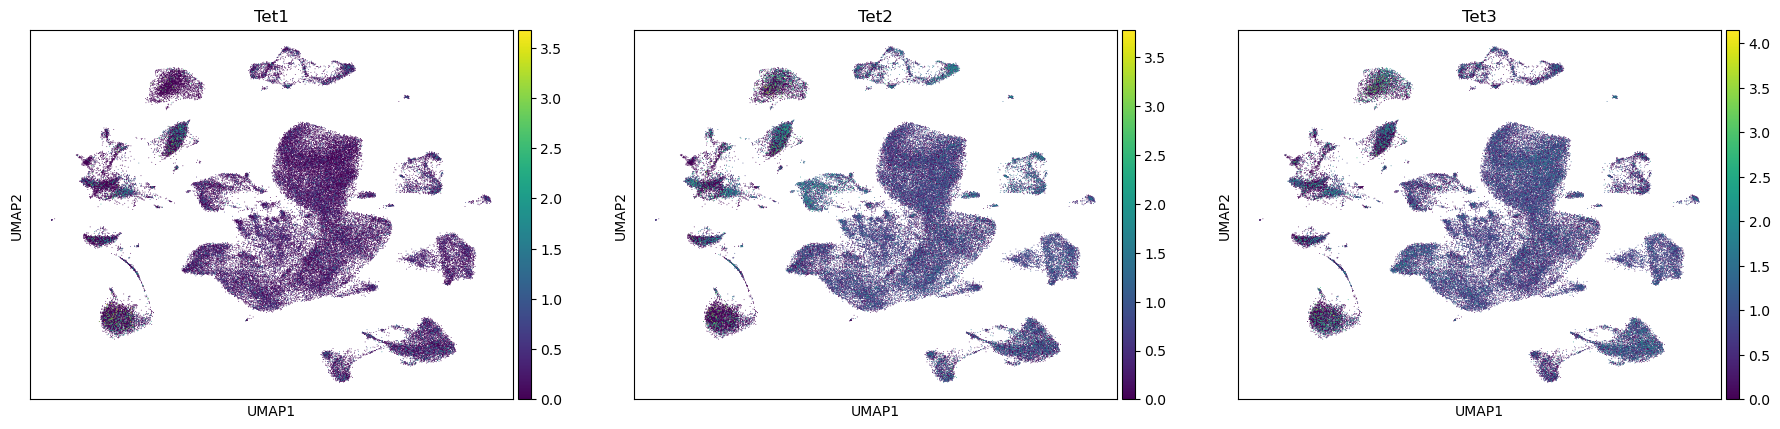

In [29]:
sc.pl.umap(adata_sc, color=["Tet1",'Tet2',"Tet3"])

In [40]:
adata_sc.obs

,sample,group,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,pct_counts_mt,leiden,pred_dmb,pred_mwb,pred_mdg,pred_mih,pred_mpd,sampleID,tech,louvain
CATTCTATACTAGATCA-0-0,W1,W,451,6.113682,507.0,6.230482,20.907298,30.769231,50.493097,100.000000,...,0.197239,20,Blood: Erythrocyte,319 Astro-TE NN,CA3-Pyr,Micro-PVM,Granule-mature,W_W1,polyA,10
TGTTCCGGCTTTGATCG-0-0,W1,W,372,5.921578,509.0,6.234411,34.970530,46.561886,66.208251,100.000000,...,10.412574,20,Blood: Erythrocyte,319 Astro-TE NN,CA3-Pyr,Micro-PVM,Granule-mature,W_W1,polyA,20
TGAGACTATGTGAGGCT-0-0,W1,W,440,6.089045,510.0,6.236370,23.529412,33.333333,52.941176,100.000000,...,0.000000,20,Blood: Erythrocyte,319 Astro-TE NN,CA3-Pyr,Micro-PVM,Granule-mature,W_W1,polyA,10
CCGAACGCGAATGGAAT-0-0,W1,W,384,5.953243,514.0,6.244167,35.019455,44.747082,64.202335,100.000000,...,0.000000,11,Blood: Erythrocyte,334 Microglia NN,MiCajal-Retziusoglia,Micro-PVM,Microglia,W_W1,polyA,11
ATCACAGATGGGCATAT-0-0,W1,W,364,5.899897,517.0,6.249975,39.264990,48.936170,68.278530,100.000000,...,1.934236,11,Immune: Non-cycling microglia,334 Microglia NN,MiCajal-Retziusoglia,Micro-PVM,Microglia,W_W1,polyA,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTAAGGTCG-1-1-1-1,C3,C,1749,7.467371,3157.0,8.057694,27.272727,34.748179,44.029142,60.437124,...,0.095027,1,Blood: Erythrocyte,007 L2/3 IT CTX Glut,CA3-Pyr,L2/3 IT CTX,Cck-Tox,C_C3,10x,2
TTTGTTGGTCTTCTAT-1-1-1-1,C3,C,2226,7.708411,4641.0,8.442901,24.757595,32.686921,42.727860,58.608059,...,0.043094,17,Blood: Erythrocyte,022 L5 ET CTX Glut,CA3-Pyr,L5 PT CTX,Cck-Tox,C_C3,10x,8
TTTGTTGGTGTGTGGA-1-1-1-1,C3,C,1766,7.477038,3170.0,8.061802,25.962145,33.028391,42.523659,60.063091,...,0.000000,9,Blood: Erythrocyte,006 L4/5 IT CTX Glut,CA3-Pyr,L5 IT CTX,Cck-Tox,C_C3,10x,4
TTTGTTGGTTGCGGAA-1-1-1-1,C3,C,2075,7.638198,4550.0,8.423102,27.956044,36.417582,46.879121,62.703297,...,0.043956,30,Blood: Erythrocyte,029 L6b CTX Glut,CA3-Pyr,L6b CTX,Cck-Tox,C_C3,10x,26


/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


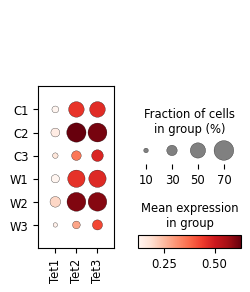

In [47]:
sc.pl.dotplot(adata_sc, var_names=["Tet1",'Tet2',"Tet3"], groupby="sample")

/home/junyichen/anaconda3/envs/allcools/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


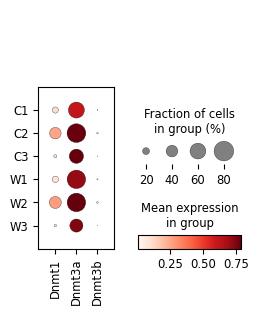

In [48]:
sc.pl.dotplot(adata_sc, var_names=["Dnmt1",'Dnmt3a',"Dnmt3b"], groupby="sample")

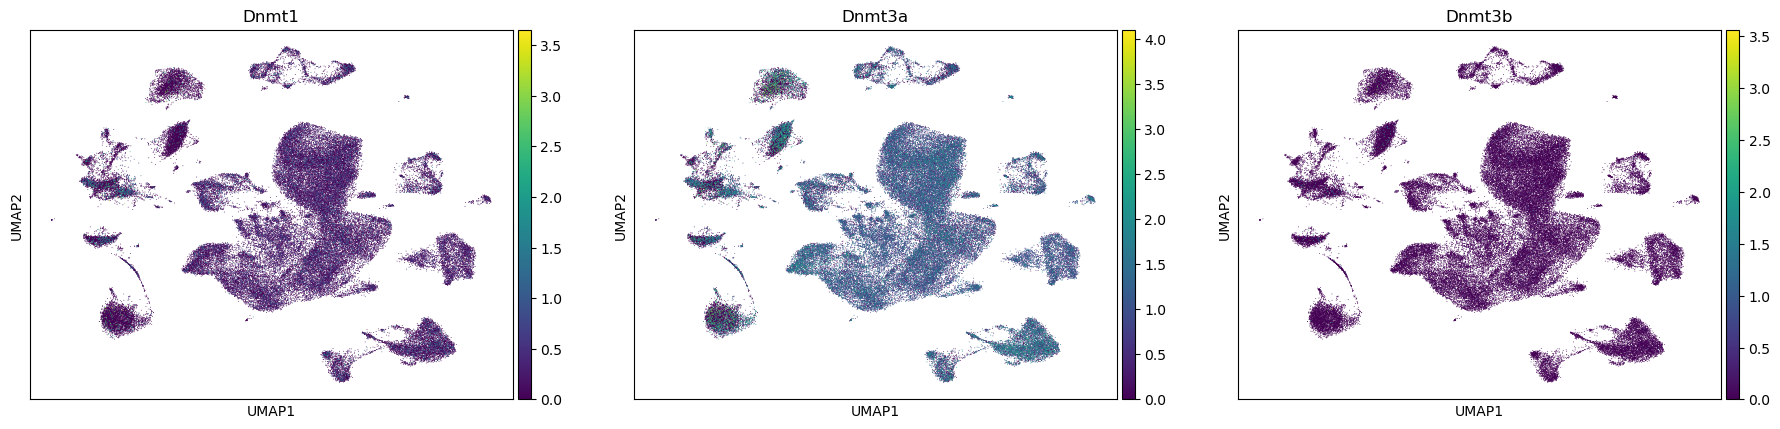

In [30]:
sc.pl.umap(adata_sc, color=["Dnmt1",'Dnmt3a',"Dnmt3b"])

In [31]:
df_subclass = pd.read_csv("output/subclass.csv.gz", index_col=0)

In [32]:
df_subclass

,0
0,DG-PIR Ex IMN
1,L6 CT CTX Glut
2,CT SUB Glut
3,MEA-BST Lhx6 Nr2e1 Gaba
4,STR Prox1 Lhx6 Gaba
...,...
56,OPC NN
57,CEA-AAA-BST Six3 Sp9 Gaba
58,RHP-COA Ndnf Gaba
59,ENTmv-PA-COAp Glut


In [ ]:
sc.pl.umap(adata_sc, color="")

KeyError: 'Could not find key ENSMUSG00000040943 in .var_names or .obs.columns.'

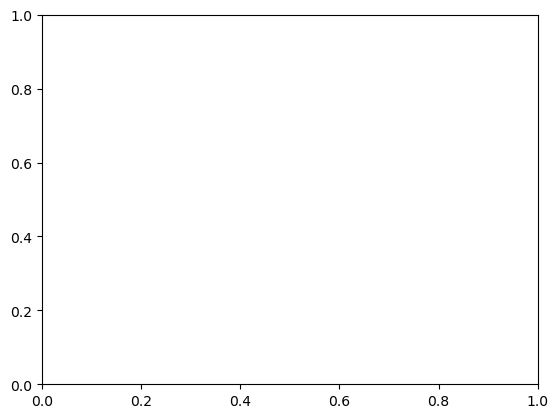

In [12]:
sc.pl.umap(adata_sc, color='ENSMUSG00000040943')

In [29]:
adata_sc2 = adata.read_h5ad("/data1st1/hydata/pfc_3tech_int_byID.h5ad")

OSError: Unable to synchronously open file (file signature not found)

In [26]:
adata_sc2.X

<214028x28071 sparse matrix of type '<class 'numpy.float64'>'
	with 420586189 stored elements in Compressed Sparse Column format>

In [38]:
df_fracs = pd.read_csv("/data2st1/junyi/WT_W26/outs/fragments.tsv.gz", sep="\t", skiprows=50,header=None)

In [40]:
df_fracs.to_csv("/data2st1/junyi/WT_W26/outs/fragments.bed", sep="\t", index=False, header=False)

In [43]:
df_anno = pd.read_csv("/data2st1/junyi/region_formodkit_anotation.bed", sep="\t",)

/tmp/ipykernel_1537723/1299959557.py:1: DtypeWarning: Columns (0,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anno = pd.read_csv("/data2st1/junyi/region_formodkit_anotation.bed", sep="\t",)


In [46]:
set(df_anno.subtype)

{nan,
 '(ATGCAA)n:Simple_repeat:Simple_repeat',
 '(GCACA)n:Simple_repeat:Simple_repeat',
 'RLTR45-int:LTR:ERVK',
 '(AGCCC)n:Simple_repeat:Simple_repeat',
 '(CTTTAC)n:Simple_repeat:Simple_repeat',
 '(GGTATA)n:Simple_repeat:Simple_repeat',
 '(CCCCTA)n:Simple_repeat:Simple_repeat',
 '(ACACACTC)n:Simple_repeat:Simple_repeat',
 '(TGGGG)n:Simple_repeat:Simple_repeat',
 '(CTTCCGC)n:Simple_repeat:Simple_repeat',
 '(AGGCAGAGGC)n:Simple_repeat:Simple_repeat',
 '(ACACCAGA)n:Simple_repeat:Simple_repeat',
 '(CTTATGC)n:Simple_repeat:Simple_repeat',
 '(AGGAAGGG)n:Simple_repeat:Simple_repeat',
 '(GTGAA)n:Simple_repeat:Simple_repeat',
 '(GACCATG)n:Simple_repeat:Simple_repeat',
 '(ACACACC)n:Simple_repeat:Simple_repeat',
 '(TCCAGAA)n:Simple_repeat:Simple_repeat',
 '(CGCGCGG)n:Simple_repeat:Simple_repeat',
 '(TGGTGAC)n:Simple_repeat:Simple_repeat',
 '(CTGTGCT)n:Simple_repeat:Simple_repeat',
 '(GGGCA)n:Simple_repeat:Simple_repeat',
 '(AGCCCTTT)n:Simple_repeat:Simple_repeat',
 '(TTACTGA)n:Simple_repeat:Simp